In [1]:
#Here we import all the necessary dependencies
import numpy as np
import matplotlib.pyplot as plt
import time
import amuse.plot as plot
from IPython.display import clear_output
from amuse.lab import units, constants
from amuse.ext.orbital_elements import new_binary_from_orbital_elements
from amuse.ext.orbital_elements import get_orbital_elements_from_binary
from amuse.ext.orbital_elements import get_orbital_elements_from_binaries
from amuse.lab import Particles
from amuse.lab import nbody_system
from amuse.io import write_set_to_file, read_set_from_file

In [2]:
data_loc = "Results/"

In [3]:
logtimes = [-1e9,6.698,7.0,7.176,7.301,7.397,7.477,7.544,7.602,7.653,7.698,7.740,7.778,7.812,7.845,7.875,7.903,7.929,7.954,7.977,8]
times = 10**np.array(logtimes)

MWG4_0 = read_set_from_file(data_loc + "MWG_run4_time=-inf.hdf5", format = "hdf5")
MWG4_1 = read_set_from_file(data_loc + "MWG_run4_time=6.698.hdf5", format = "hdf5")
MWG4_2 = read_set_from_file(data_loc + "MWG_run4_time=7.0.hdf5", format = "hdf5")
MWG4_3 = read_set_from_file(data_loc + "MWG_run4_time=7.176.hdf5", format = "hdf5")
MWG4_4 = read_set_from_file(data_loc + "MWG_run4_time=7.301.hdf5", format = "hdf5")
MWG4_5 = read_set_from_file(data_loc + "MWG_run4_time=7.397.hdf5", format = "hdf5")
MWG4_6 = read_set_from_file(data_loc + "MWG_run4_time=7.477.hdf5", format = "hdf5")
MWG4_7 = read_set_from_file(data_loc + "MWG_run4_time=7.544.hdf5", format = "hdf5")
MWG4_8 = read_set_from_file(data_loc + "MWG_run4_time=7.602.hdf5", format = "hdf5")
MWG4_9 = read_set_from_file(data_loc + "MWG_run4_time=7.653.hdf5", format = "hdf5")
MWG4_10 = read_set_from_file(data_loc + "MWG_run4_time=7.698.hdf5", format = "hdf5")
MWG4_11 = read_set_from_file(data_loc + "MWG_run4_time=7.740.hdf5", format = "hdf5")
MWG4_12 = read_set_from_file(data_loc + "MWG_run4_time=7.778.hdf5", format = "hdf5")
MWG4_13 = read_set_from_file(data_loc + "MWG_run4_time=7.812.hdf5", format = "hdf5")
MWG4_14 = read_set_from_file(data_loc + "MWG_run4_time=7.845.hdf5", format = "hdf5")
MWG4_15 = read_set_from_file(data_loc + "MWG_run4_time=7.875.hdf5", format = "hdf5")
MWG4_16 = read_set_from_file(data_loc + "MWG_run4_time=7.903.hdf5", format = "hdf5")
MWG4_17 = read_set_from_file(data_loc + "MWG_run4_time=7.929.hdf5", format = "hdf5")
MWG4_18 = read_set_from_file(data_loc + "MWG_run4_time=7.954.hdf5", format = "hdf5")
MWG4_19 = read_set_from_file(data_loc + "MWG_run4_time=7.977.hdf5", format = "hdf5")
MWG4_20 = read_set_from_file(data_loc + "MWG_run4_final.hdf5", format = "hdf5")

In [4]:
sets = []
for i in range(21):
    exec("sets.append(MWG4_"+str(i)+")")

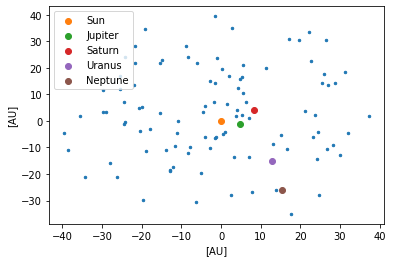

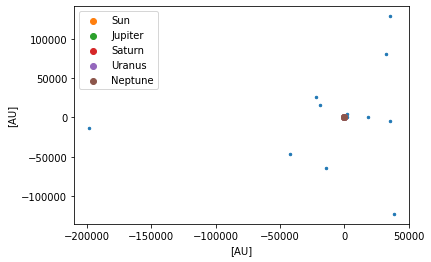

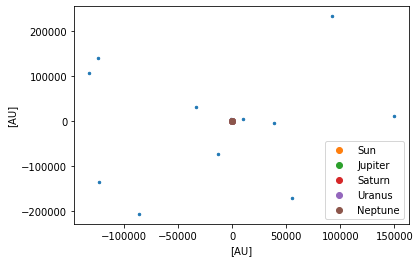

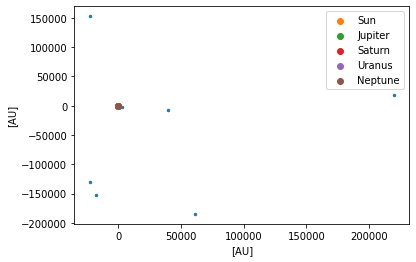

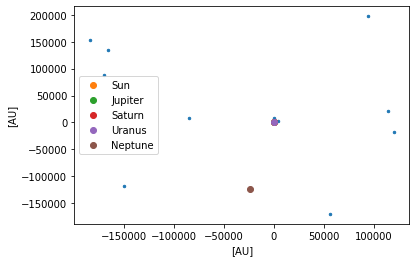

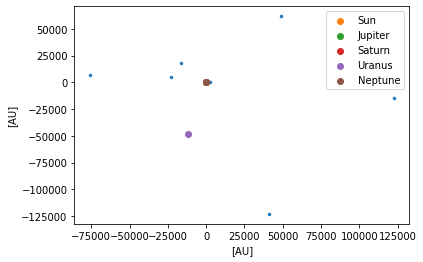

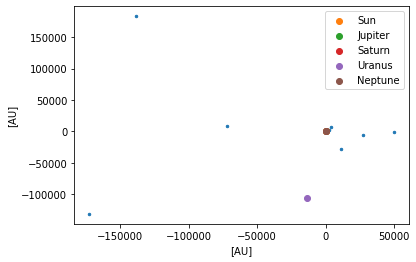

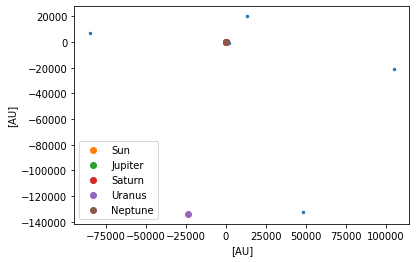

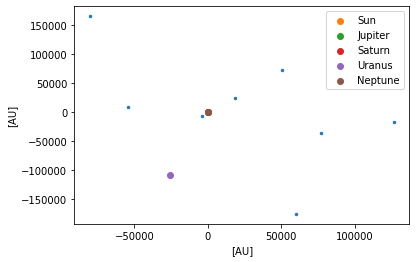

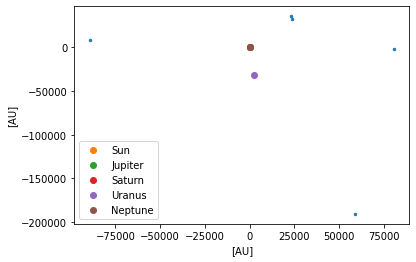

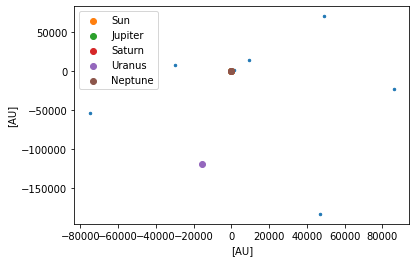

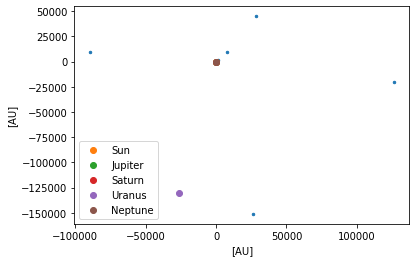

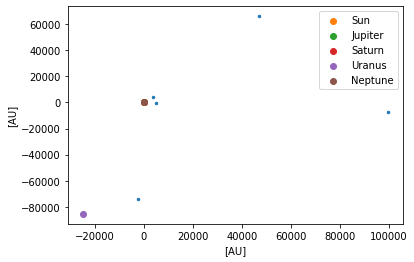

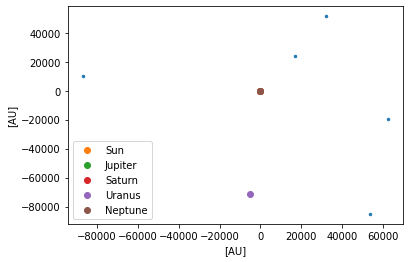

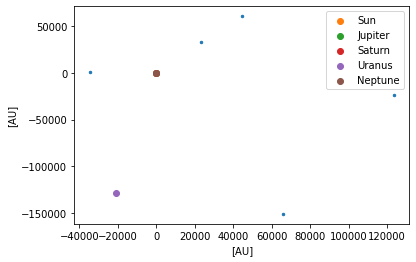

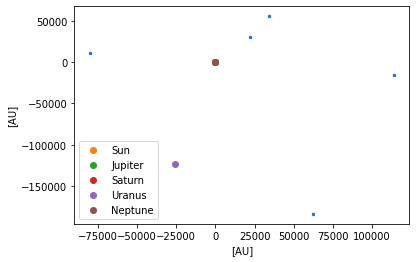

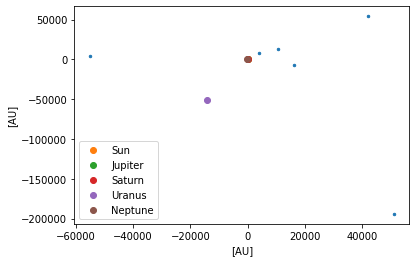

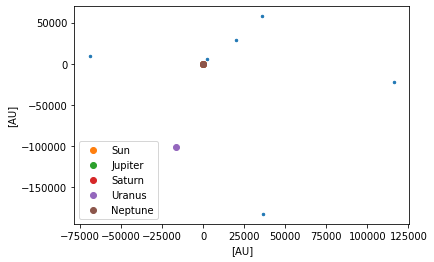

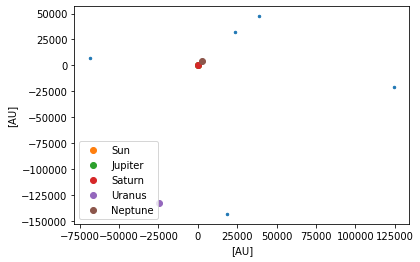

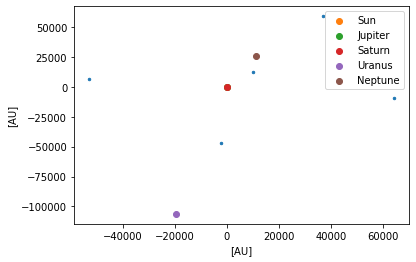

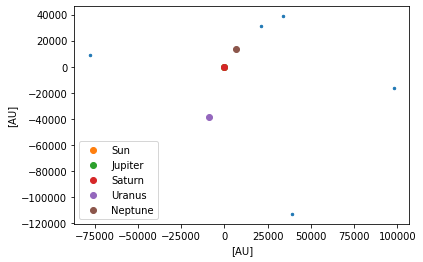

In [5]:
names = ['Sun', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
for particles in sets:
    particles.position -= particles[0].position # Change coordinates of all particles to be centered around the Sun
    plot.scatter(particles.x.in_(units.AU), particles.y.in_(units.AU), s=6)
    for j in range(5):
        plot.scatter(particles[j].x.in_(units.AU), particles[j].y.in_(units.AU), label = names[j])
    plt.legend()
    #plot.xlim(particles[0].x -  (200 | units.AU), particles[0].x + (200 | units.AU))
    #plot.ylim(particles[0].y -  (200 | units.AU), particles[0].y + (200 | units.AU))
    plt.show()

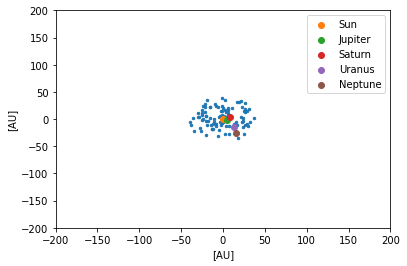

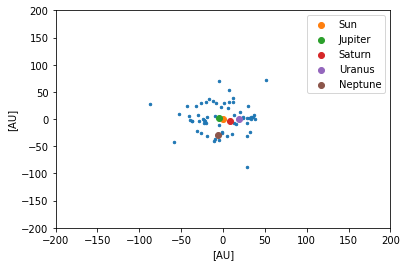

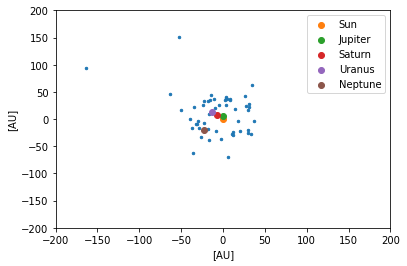

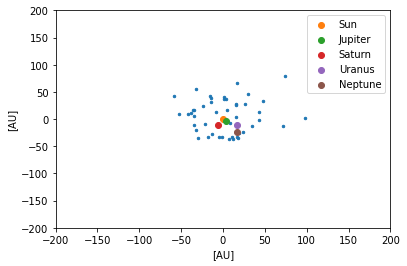

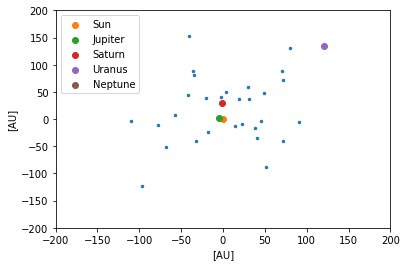

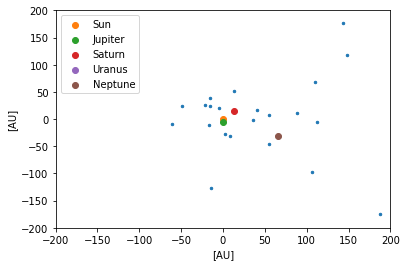

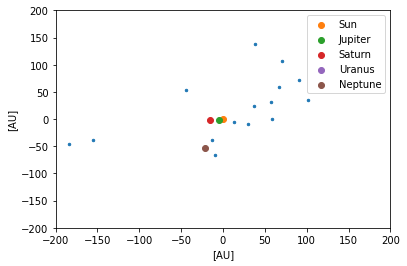

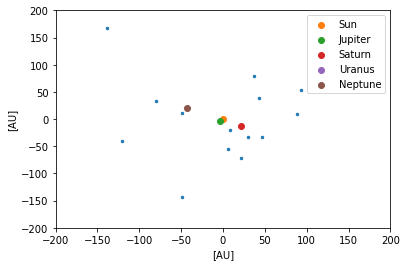

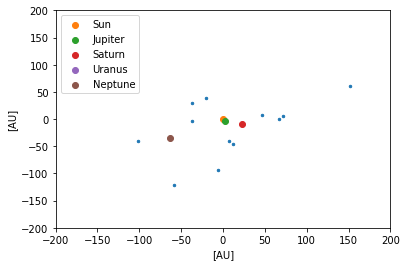

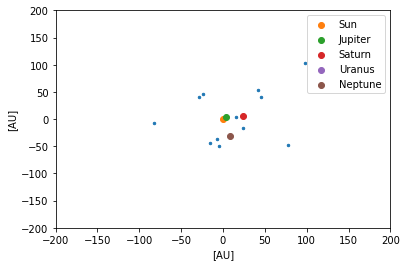

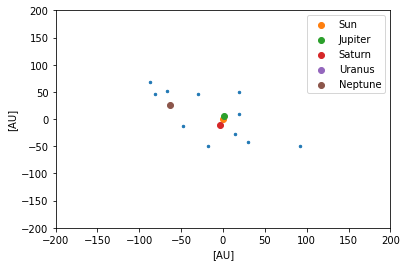

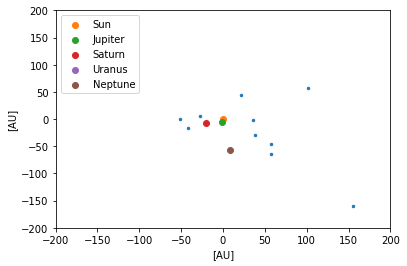

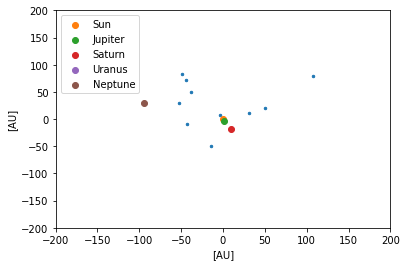

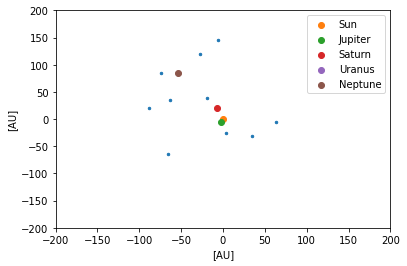

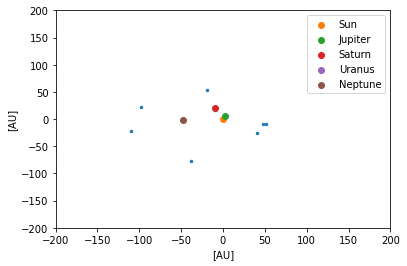

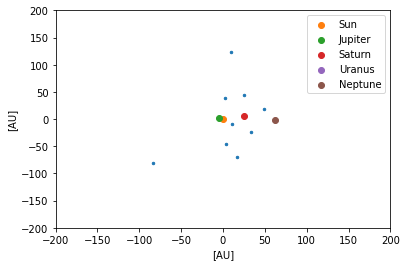

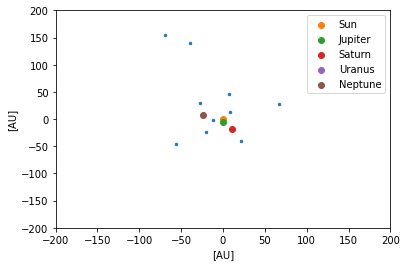

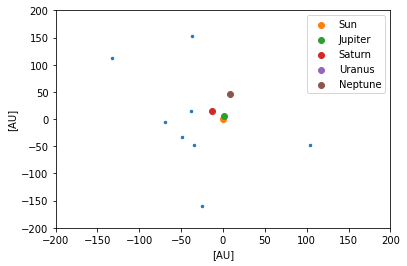

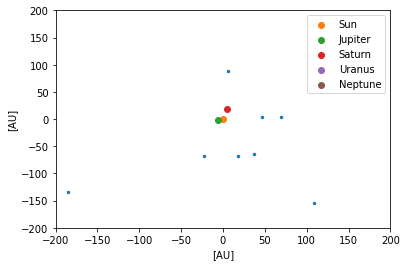

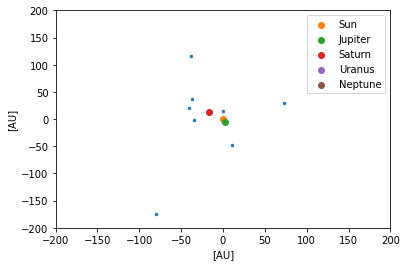

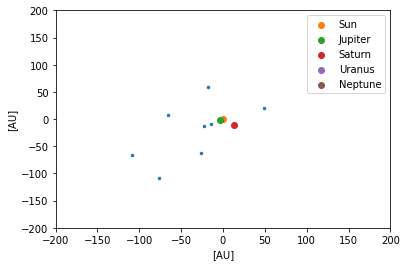

In [6]:
for particles in sets:
    plot.scatter(particles.x.in_(units.AU), particles.y.in_(units.AU), s=6)
    for j in range(5):
        plot.scatter(particles[j].x.in_(units.AU), particles[j].y.in_(units.AU), label = names[j])
    plt.legend()
    plot.xlim(particles[0].x -  (200 | units.AU), particles[0].x + (200 | units.AU))
    plot.ylim(particles[0].y -  (200 | units.AU), particles[0].y + (200 | units.AU))
    plt.show()

In [7]:
def separations(p1, p2):
    return (p1.position - p2.position).lengths()

def v_esc(M,r):
    return (2*constants.G*M/r).sqrt()

def v_rel(Sun, particles):
    return (Sun.velocity-particles.velocity).lengths()

def a_orbit(Sun, particles):
    return get_orbital_elements_from_binaries(Sun, particles, constants.G)[2]

/home/pim/amuse-env/lib/python3.8/site-packages/amuse/units/quantities.py:135: RuntimeWarning: invalid value encountered in true_divide
  return new_quantity_nonone(operator.__truediv__(self.number,other.number), (self.unit / other.unit).to_simple_form())


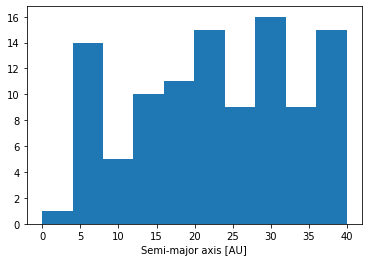

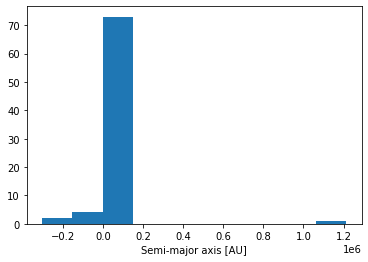

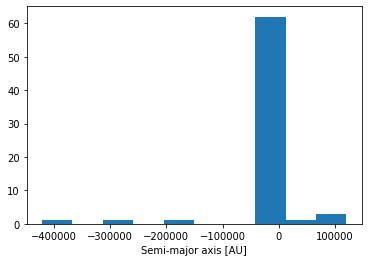

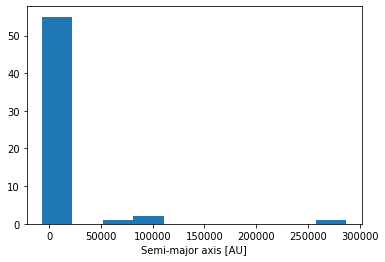

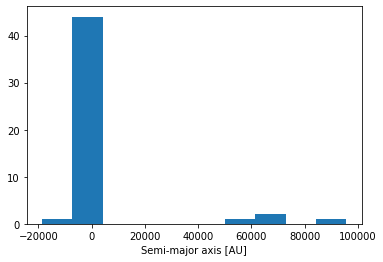

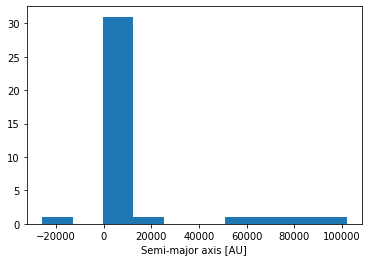

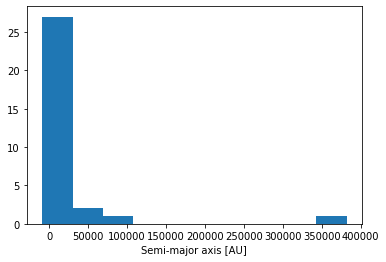

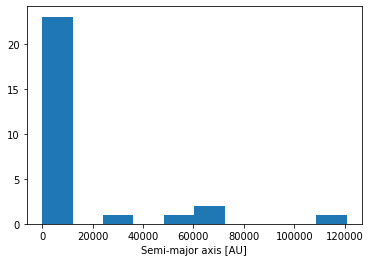

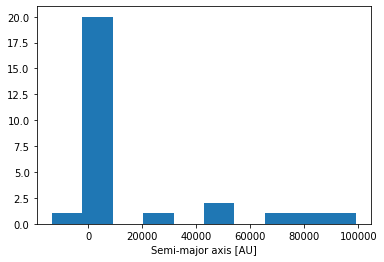

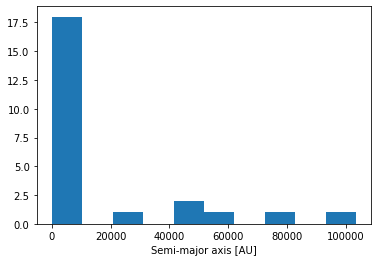

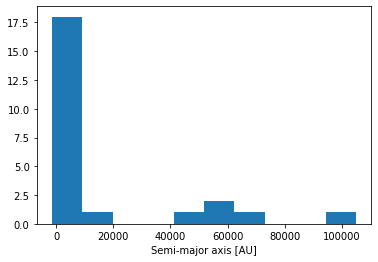

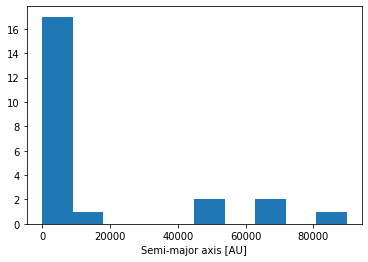

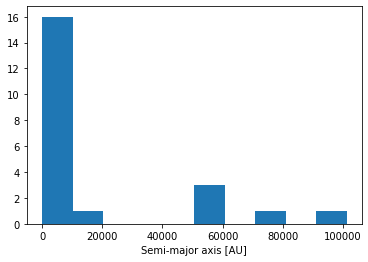

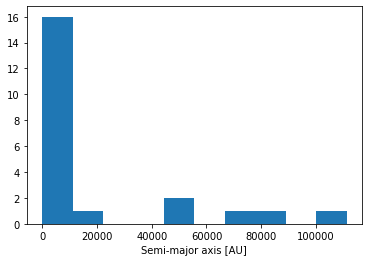

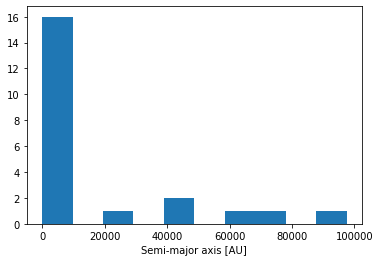

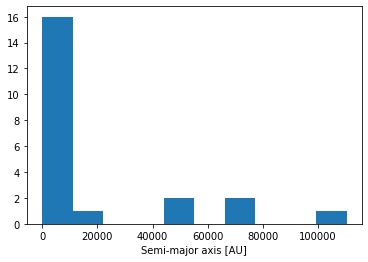

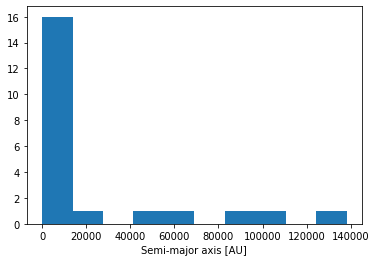

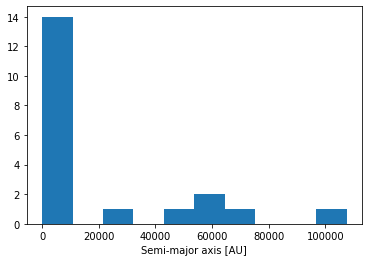

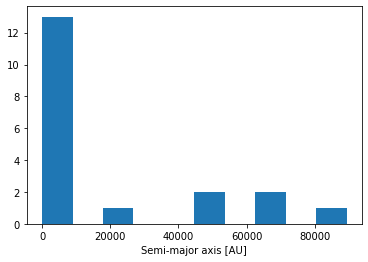

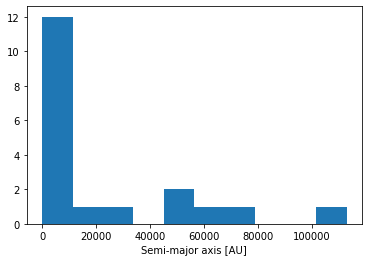

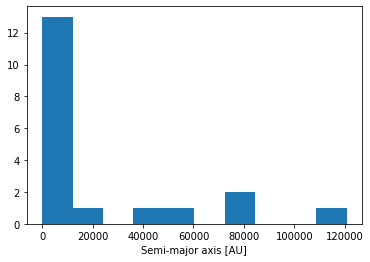

In [8]:
for particles in sets:
    plot.hist(a_orbit(particles[0], particles).in_(units.AU))
    plt.xlabel("Semi-major axis [AU]")
    plt.show()

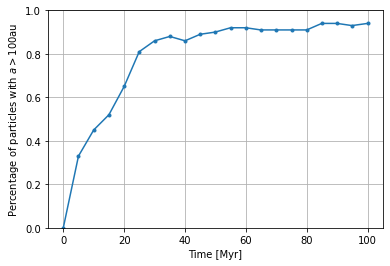

In [9]:
# Determine the percentage of particles with a > 100 AU in each timestep
percentage = []
n_particles = len(sets[0]) - 5
for particles in sets:
    n_deleted_ps = n_particles - (len(particles)-5)
    percentage.append((sum(a_orbit(particles[0], particles[5:]) > (100 | units.AU)) + n_deleted_ps) / n_particles)
plt.plot(times/1e6, percentage, marker='.')
plt.xlabel("Time [Myr]")
plt.ylabel(r"Percentage of particles with $a>100$au")
plt.grid()
plt.ylim(0, 1)
plt.show()
np.save('percentage4MWG.npy', percentage)

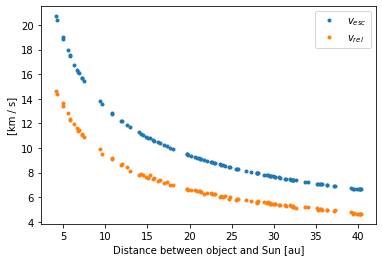

Text(0, 0.5, '$v_{esc}$')

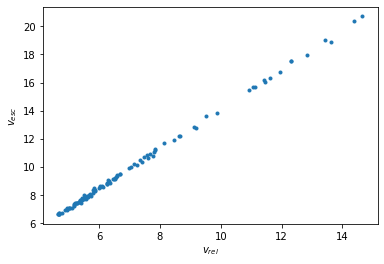

In [10]:
plot.plot(separations(sets[0][0], sets[0][1:]), v_esc(sets[0][0].mass, separations(sets[0][0], sets[0][1:])).in_(units.km/units.s), linewidth=0, marker='.', label=r"$v_{esc}$")
plot.plot(separations(sets[0][0], sets[0][1:]), v_rel(sets[0][0], sets[0][1:]).in_(units.km/units.s), linewidth=0, marker='.', label=r"$v_{rel}$")
plt.xlabel("Distance between object and Sun [au]")
plt.legend()
plt.show()
plot.plot(v_rel(sets[0][0], sets[0][1:]).in_(units.km/units.s), v_esc(sets[0][0].mass, separations(sets[0][0], sets[0][1:])).in_(units.km/units.s), linewidth=0, marker='.')
plt.xlabel(r"$v_{rel}$")
plt.ylabel(r"$v_{esc}$")

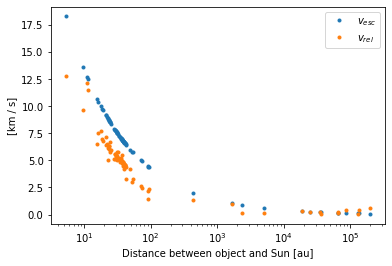

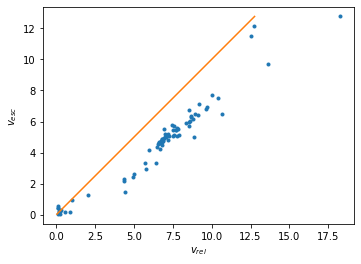

In [11]:
plot.plot(separations(sets[1][0], sets[1][1:]), v_esc(sets[1][0].mass, separations(sets[1][0], sets[1][1:])).in_(units.km/units.s), linewidth=0, marker='.', label=r"$v_{esc}$")
plot.plot(separations(sets[1][0], sets[1][1:]), v_rel(sets[1][0], sets[1][1:]).in_(units.km/units.s), linewidth=0, marker='.', label=r"$v_{rel}$")
plt.xlabel("Distance between object and Sun [au]")
plt.xscale('log')
plt.legend()
plt.show()
plot.plot(v_esc(sets[1][0].mass, separations(sets[1][0], sets[1][1:])).in_(units.km/units.s), v_rel(sets[1][0], sets[1][1:]).in_(units.km/units.s), linewidth=0, marker='.')
plot.plot([min(v_rel(sets[1][0], sets[1][1:]).in_(units.km/units.s)).number, max(v_rel(sets[1][0], sets[1][1:]).in_(units.km/units.s)).number], [min(v_rel(sets[1][0], sets[1][1:]).in_(units.km/units.s)).number, max(v_rel(sets[1][0], sets[1][1:]).in_(units.km/units.s)).number])
plt.xlabel(r"$v_{rel}$")
plt.ylabel(r"$v_{esc}$")
plt.axis('scaled');

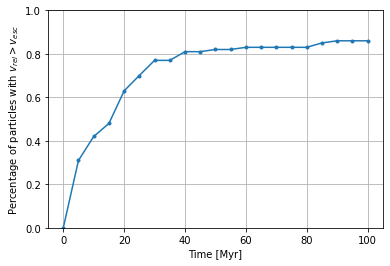

In [25]:
percentages = []
n_particles = len(sets[0])
for i in range(0, 21):
    # mask gives boolean array with True where v_rel > v_esc
    mask = v_rel(sets[i][0], sets[i][5:]).in_(units.km/units.s) > v_esc(sets[i][0].mass, separations(sets[i][0], sets[i][5:])).in_(units.km/units.s)
    n_deleted_ps = n_particles - len(sets[i])
    percentages.append((sum(mask)+n_deleted_ps)/100)
plt.plot(times/1e6, percentages, marker='.')
plt.xlabel("Time [Myr]")
plt.ylabel("Percentage of particles with $v_{rel}>v_{esc}$")
plt.grid()
plt.ylim(0, 1)
plt.show()
np.save('vrel_vesc_percentage4MWG.npy', percentages)

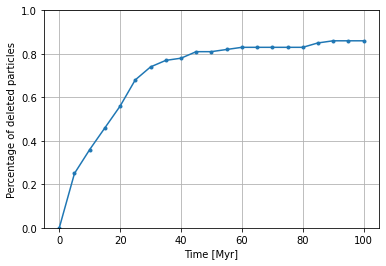

In [13]:
# Percentage of particles with distance from Sun > 300.000 AU, which is ~ the amount of particles deleted.
n_particles = len(sets[0][5:])
n_deleted = []
for i in range(0, 21):
    n_deleted.append(n_particles - len(sets[i][5:]))
plt.plot(times/1e6, np.array(n_deleted)/100, marker='.')
plt.xlabel("Time [Myr]")
plt.ylabel(r"Percentage of deleted particles")
plt.grid()
plt.ylim(0, 1)
plt.show()
np.save('deleted_percentage4MWG.npy', np.array(n_deleted)/100)

In [14]:
def eccentricities(Sun, particles):
    return get_orbital_elements_from_binaries(Sun, particles, constants.G)[3]

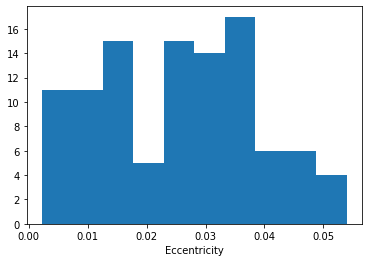

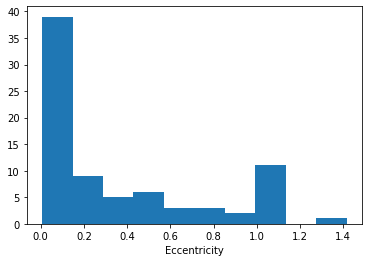

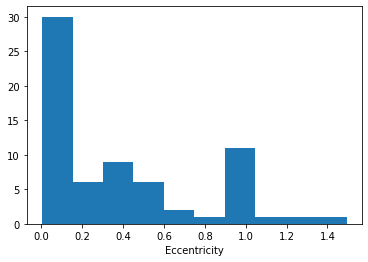

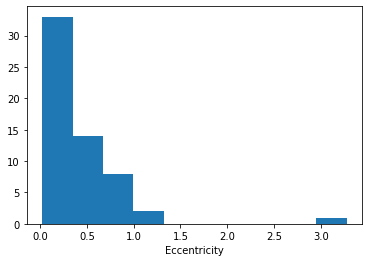

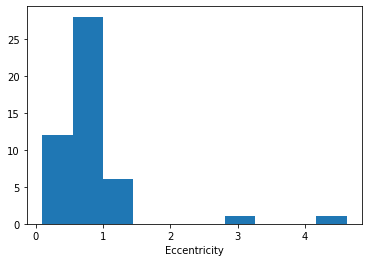

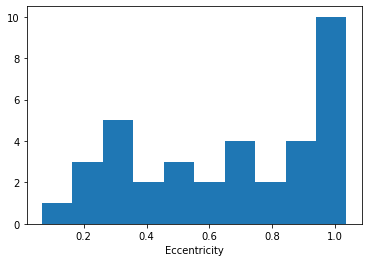

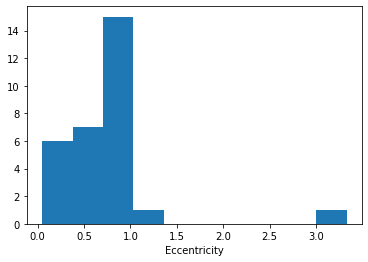

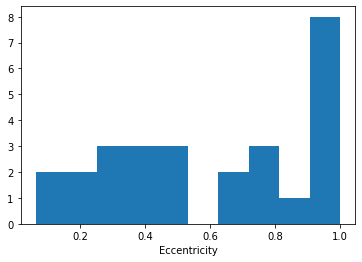

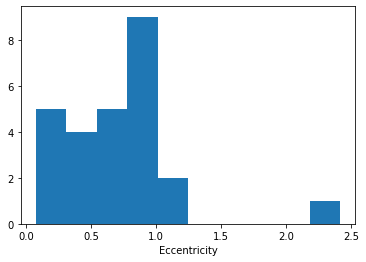

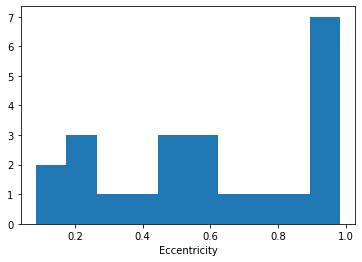

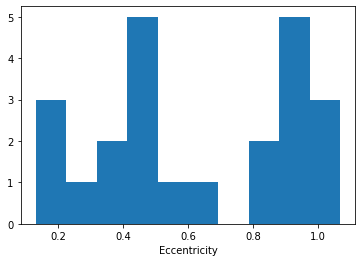

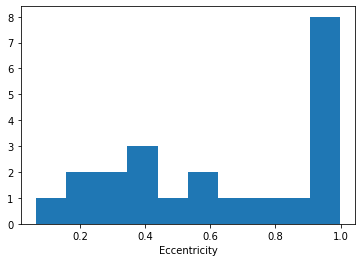

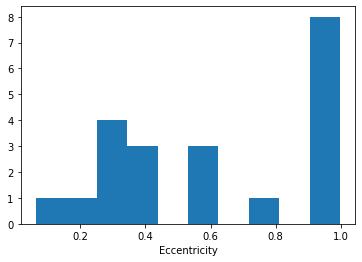

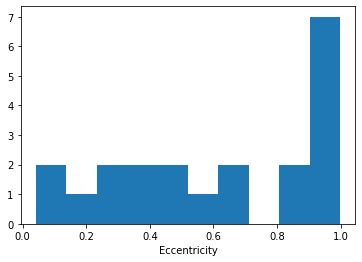

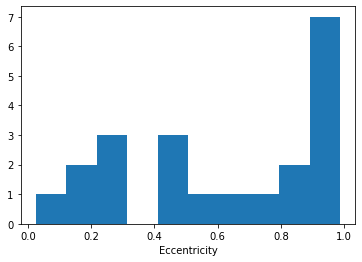

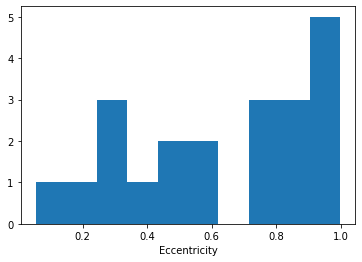

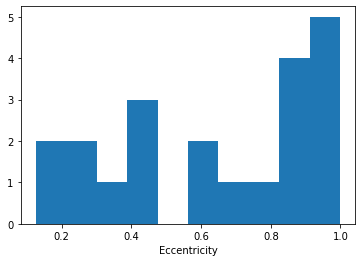

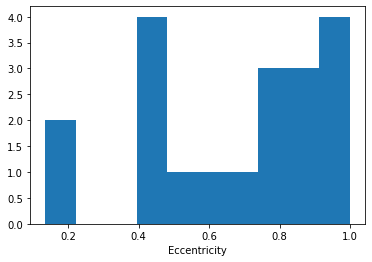

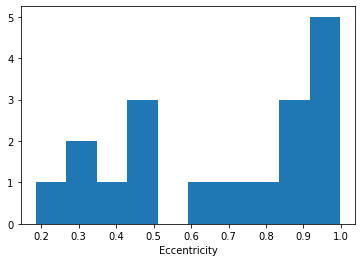

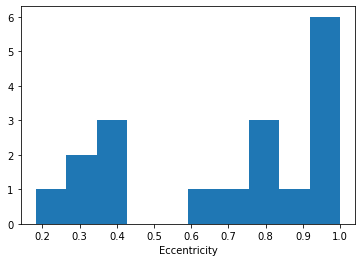

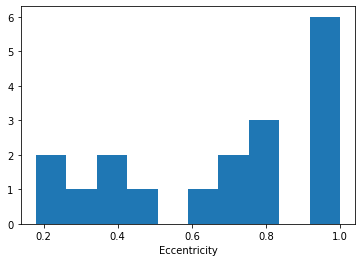

In [15]:
for particles in sets:
    plot.hist(eccentricities(particles[0], particles[1:]))
    plt.xlabel("Eccentricity")
    plt.show()

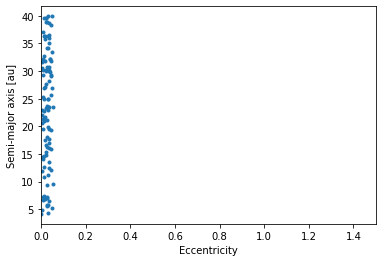

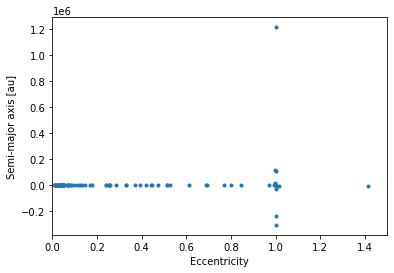

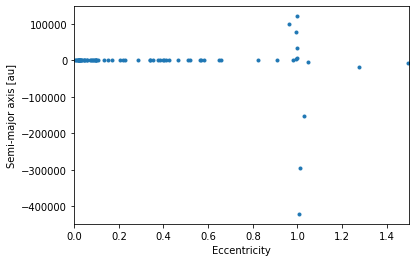

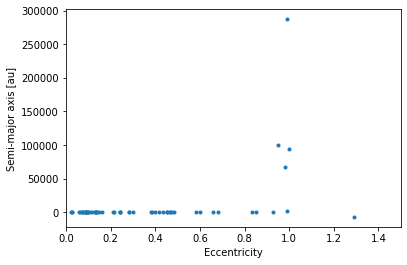

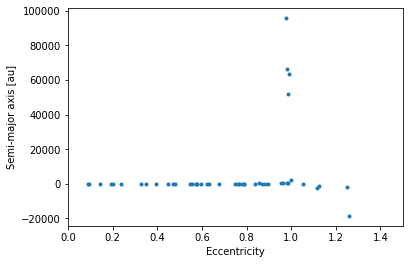

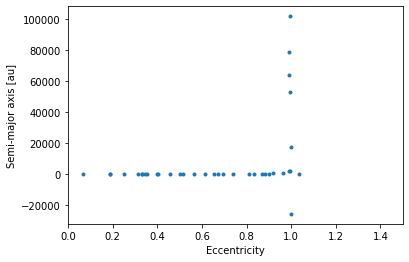

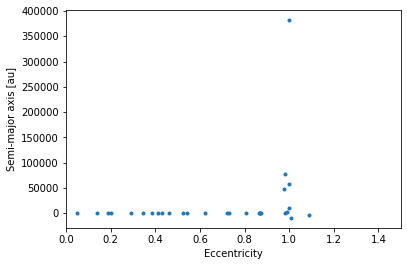

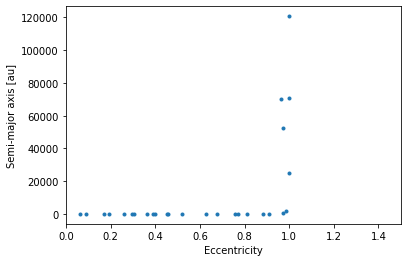

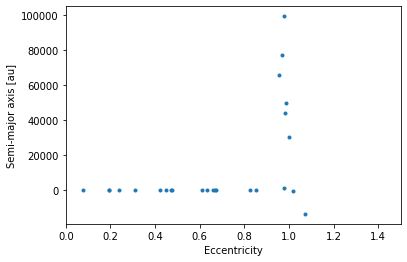

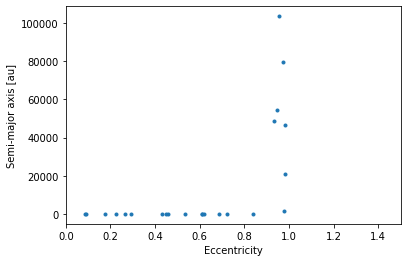

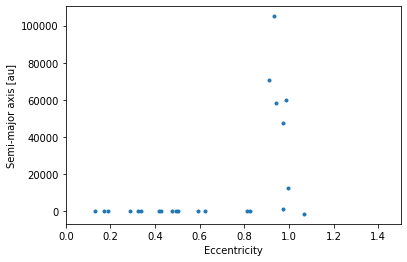

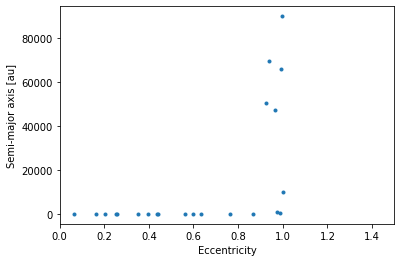

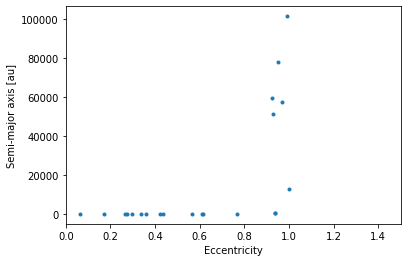

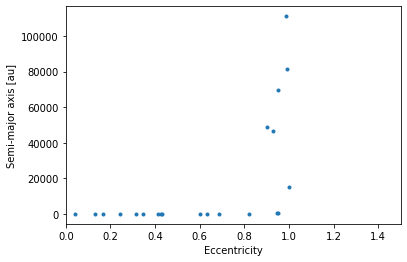

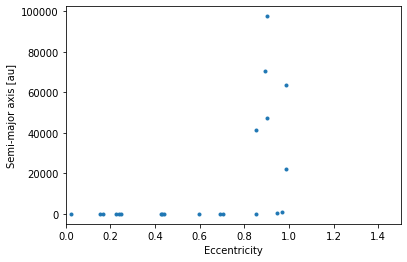

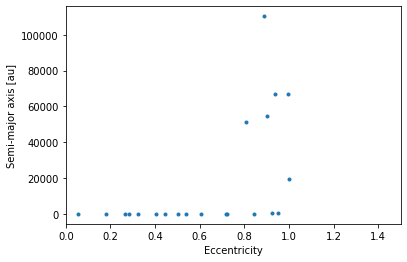

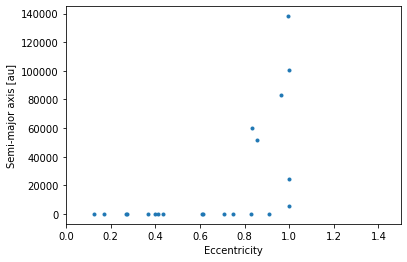

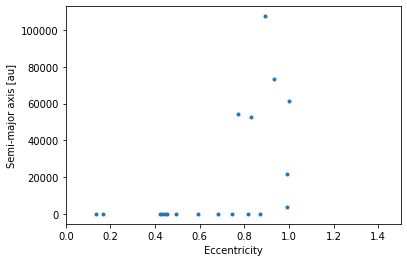

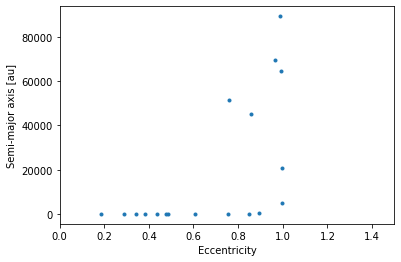

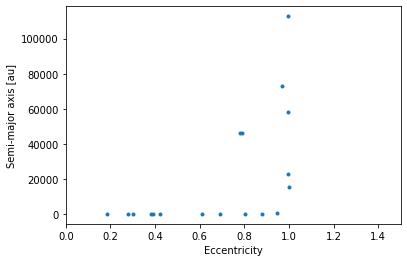

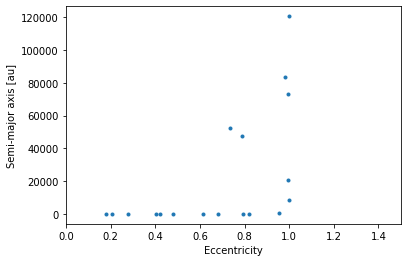

In [16]:
for particles in sets:
    plot.plot(eccentricities(particles[0], particles[1:]), a_orbit(particles[0], particles[1:]).in_(units.AU), linewidth=0, marker='.')
    plt.xlabel("Eccentricity")
    plt.ylabel("Semi-major axis [au]")
    plt.xlim(0, 1.5)
    #plt.ylim(0, 1000)
    plt.show()

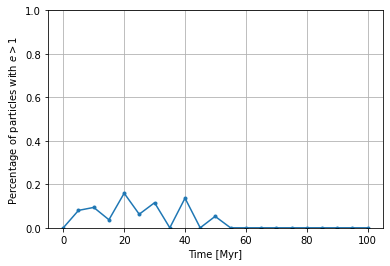

In [17]:
percentages = []
for i in range(0, 21):
    # mask gives boolean array with True where e>1
    mask = eccentricities(sets[i][0], sets[i][5:]) > 1
    percentages.append(sum(mask)/len(sets[i][5:]))
plt.plot(times/1e6, percentages, marker='.')
plt.xlabel("Time [Myr]")
plt.ylabel("Percentage of particles with $e>1$")
plt.grid()
plt.ylim(0, 1)
plt.show()
np.save('e_grtr_1_percentage4MWG.npy', percentages)

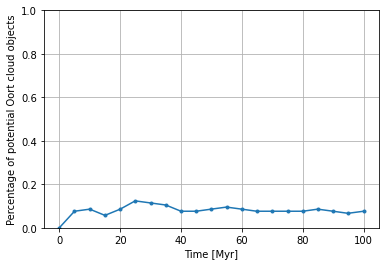

In [19]:
# Find particles that have a>100au, v_rel < v_esc, r<250.000au and e<1
percentages = []
for i in range(21):
    n_oort_objs = len(np.argwhere((a_orbit(sets[i][0], sets[i][5:]) > (100|units.AU)) & (v_rel(sets[i][0], sets[i][5:]).in_(units.km/units.s) < v_esc(sets[i][0].mass, separations(sets[i][0], sets[i][5:])).in_(units.km/units.s)) & (separations(sets[i][0], sets[i][5:])<(250000|units.AU)) & (eccentricities(sets[i][0], sets[i][5:]) < 1)))
    percentages.append(n_oort_objs / len(sets[0]))
plt.plot(times/1e6, percentages, marker='.')
plt.xlabel("Time [Myr]")
plt.ylabel("Percentage of potential Oort cloud objects")
plt.grid()
plt.ylim(0, 1)
plt.show()
np.save('pot_oort_percentage4MWG.npy', percentages)

In [20]:
# Find particles that have e < 0.9 and a > 2000 AU
oort_objs = np.argwhere((eccentricities(sets[20][0], sets[20]) < 0.9) & (a_orbit(sets[20][0], sets[20]) > 2000 |units.AU))
print("Particles that have non-hyperbolic orbits and have a semi-major axis belonging to Oort cloud objects:")
oort_obj_names = []
for i in oort_objs:
    oort_obj_names.append(sets[20][i][0].name)
    print(oort_obj_names[-1])
if oort_obj_names == []:
    print("None")

Particles that have non-hyperbolic orbits and have a semi-major axis belonging to Oort cloud objects:
OORT_60
OORT_61


/home/pim/amuse-env/lib/python3.8/site-packages/amuse/units/quantities.py:135: RuntimeWarning: invalid value encountered in true_divide
  return new_quantity_nonone(operator.__truediv__(self.number,other.number), (self.unit / other.unit).to_simple_form())


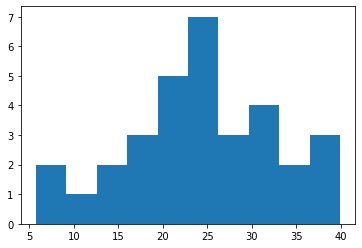

In [24]:
# Histogram of starting semi major axis of particles classified as potential Oort cloud objects
names = []
for i in range(21):
    oort_objs = np.argwhere((a_orbit(sets[i][0], sets[i]) > (100|units.AU)) & (v_rel(sets[i][0], sets[i]).in_(units.km/units.s) < v_esc(sets[i][0].mass, separations(sets[i][0], sets[i])).in_(units.km/units.s)) & (separations(sets[i][0], sets[i])<(250000|units.AU)) & (eccentricities(sets[i][0], sets[i]) < 1))
    for index in oort_objs:
        if sets[i][index].name not in names:
            names.append(sets[i][index].name)

Oort_a = np.array([])
for name in names:
    Oort_a = np.append(Oort_a, a_orbit(sets[0][0], sets[0][sets[0].name==name]).in_(units.AU).number)
plot.hist(Oort_a)
np.save('begin_a_pot_Oort_4mwg.npy', Oort_a)

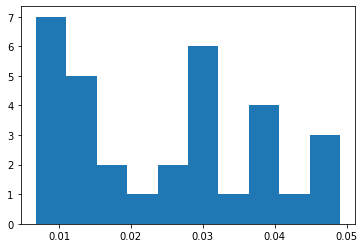

In [30]:
# Histogram of starting eccentricity of particles classified as potential Oort cloud objects
names = []
for i in range(21):
    oort_objs = np.argwhere((a_orbit(sets[i][0], sets[i]) > (100|units.AU)) & (v_rel(sets[i][0], sets[i]).in_(units.km/units.s) < v_esc(sets[i][0].mass, separations(sets[i][0], sets[i])).in_(units.km/units.s)) & (separations(sets[i][0], sets[i])<(250000|units.AU)) & (eccentricities(sets[i][0], sets[i]) < 1))
    for index in oort_objs:
        if sets[i][index].name not in names:
            names.append(sets[i][index].name)

Oort_e = np.array([])
for name in names:
    Oort_e = np.append(Oort_e, eccentricities(sets[0][0], sets[0][sets[0].name==name]))
plot.hist(Oort_e)
np.save('begin_e_pot_Oort_4mwg.npy', Oort_e)

In [37]:
min(inclinations(sets[0][0],sets[0][1:]).in_(units.deg))

quantity<0.00620492090523 deg>

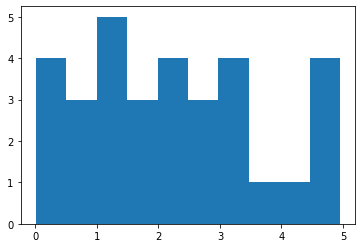

In [31]:
# Histogram of starting inclinations of particles classified as potential Oort cloud objects
names = []
for i in range(21):
    oort_objs = np.argwhere((a_orbit(sets[i][0], sets[i]) > (100|units.AU)) & (v_rel(sets[i][0], sets[i]).in_(units.km/units.s) < v_esc(sets[i][0].mass, separations(sets[i][0], sets[i])).in_(units.km/units.s)) & (separations(sets[i][0], sets[i])<(250000|units.AU)) & (eccentricities(sets[i][0], sets[i]) < 1))
    for index in oort_objs:
        if sets[i][index].name not in names:
            names.append(sets[i][index].name)

Oort_i = np.array([])
for name in names:
    Oort_i = np.append(Oort_i, inclinations(sets[0][0], sets[0][sets[0].name==name]).in_(units.deg).number)
plot.hist(Oort_i)
np.save('begin_i_pot_Oort_4mwg.npy', Oort_i)

['OORT_60' 'OORT_61']
['OORT_60' 'OORT_61']
['OORT_60' 'OORT_61']
['OORT_60' 'OORT_61']
['OORT_60' 'OORT_61']
['OORT_60' 'OORT_61']
['OORT_60' 'OORT_61']
['OORT_60' 'OORT_61']
['OORT_60' 'OORT_61']
['OORT_60' 'OORT_61']
['OORT_60' 'OORT_61']
['OORT_60' 'OORT_61']
['OORT_60' 'OORT_61']
['OORT_60' 'OORT_61']
['OORT_60' 'OORT_61']
['OORT_60' 'OORT_61']
['OORT_60' 'OORT_61']
['OORT_60' 'OORT_61']
['OORT_60' 'OORT_61']
['OORT_60' 'OORT_61']
['OORT_60' 'OORT_61']


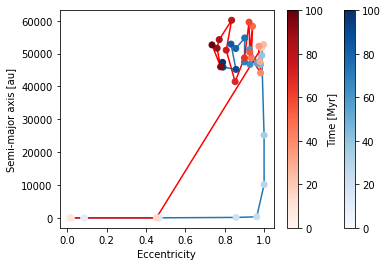

In [21]:
eccs = []
semimajoraxes = []
for particles in sets:
    indices = []
    for oort in oort_obj_names:
        indices.append(np.where(particles.name == oort)[0][0])
    p_subset = particles[indices]
    print(p_subset.name)
    eccs.append(eccentricities(particles[0], p_subset))
    semimajoraxes.append(a_orbit(particles[0], p_subset).in_(units.AU).number) # .number is necessary here to plot

eccs, semimajoraxes = np.array(eccs).T, np.array(semimajoraxes).T
plot.scatter(eccs[0], semimajoraxes[0], label=oort_obj_names[0], c=times/1e6, cmap='Blues')
plot.plot(eccs[0], semimajoraxes[0], zorder=-1, color='C0')
plt.colorbar()
plot.scatter(eccs[1], semimajoraxes[1], label=oort_obj_names[1], c=times/1e6, cmap='Reds')
plot.plot(eccs[1], semimajoraxes[1], zorder=-1, color='red')
plt.xlabel("Eccentricity")
plt.ylabel("Semi-major axis [au]")
plt.colorbar(label="Time [Myr]")
plt.show()

In [28]:
def inclinations(Sun, particles):
    return get_orbital_elements_from_binaries(Sun, particles, constants.G)[5]

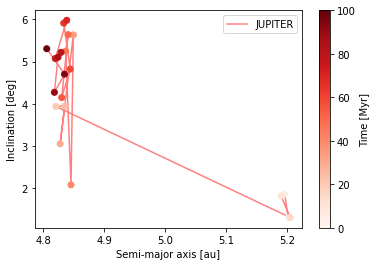

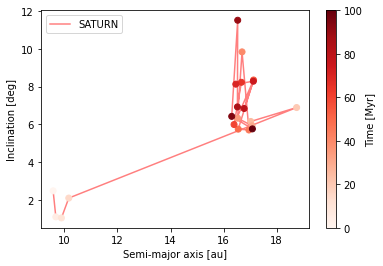

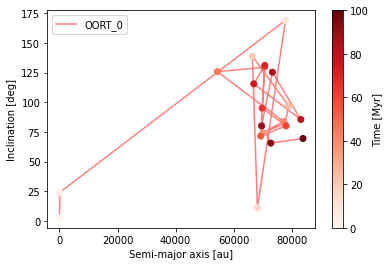

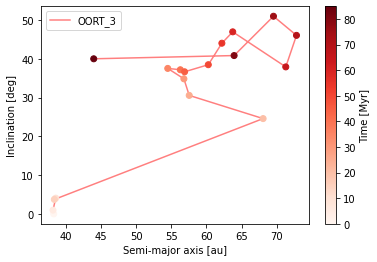

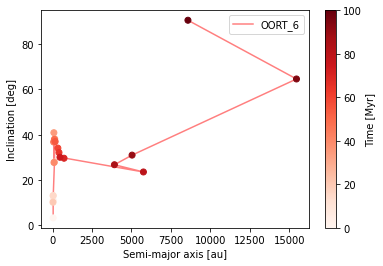

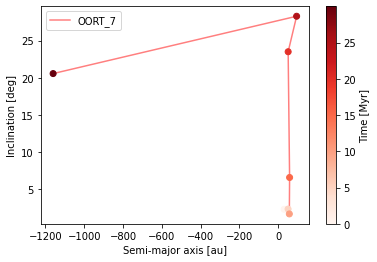

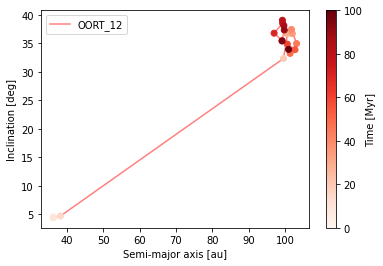

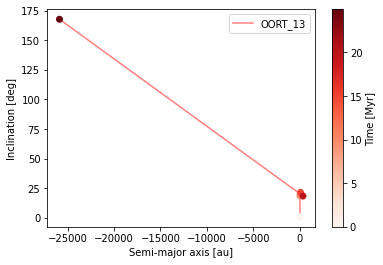

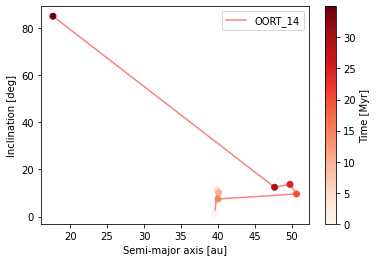

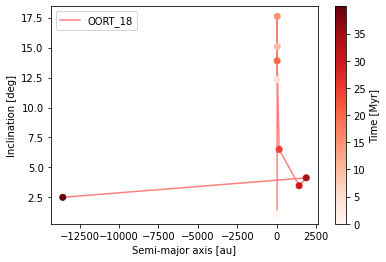

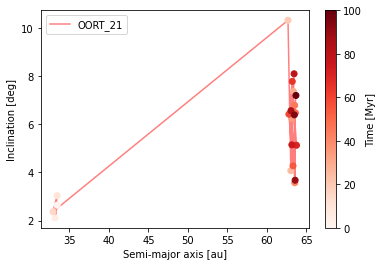

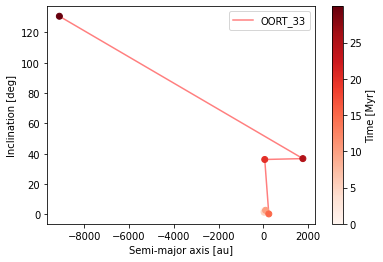

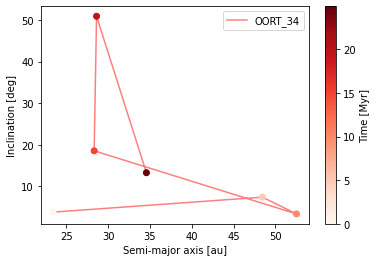

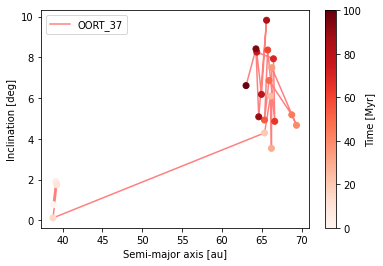

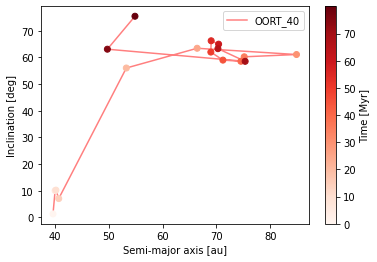

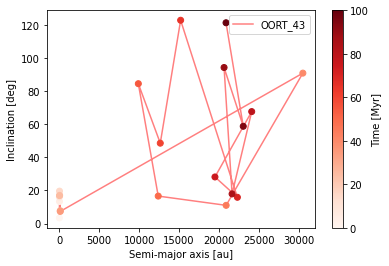

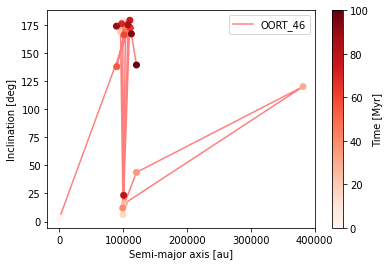

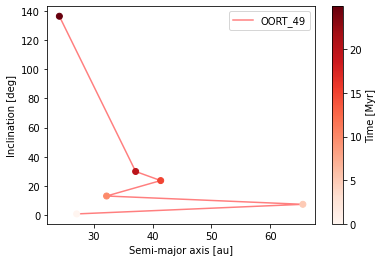

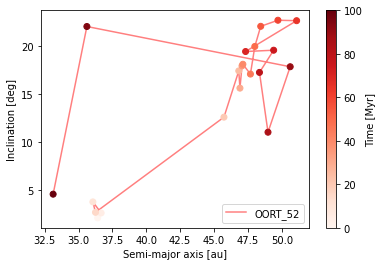

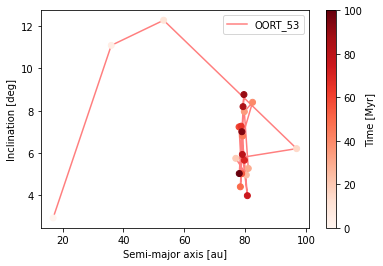

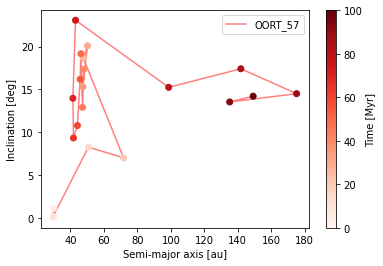

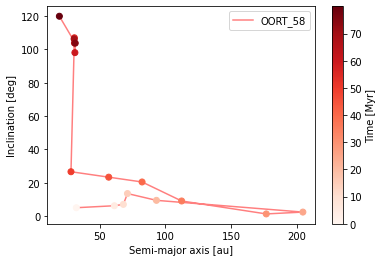

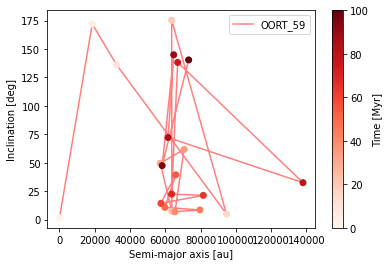

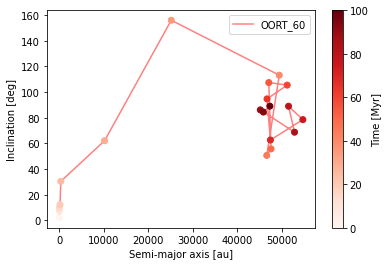

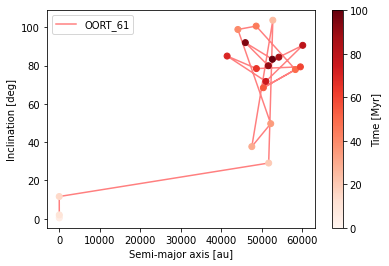

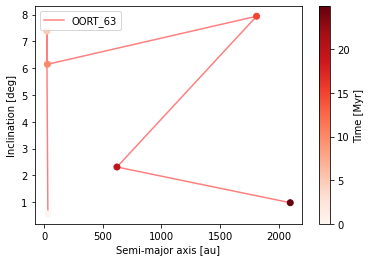

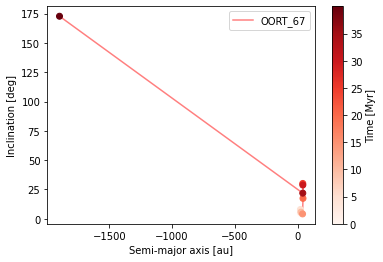

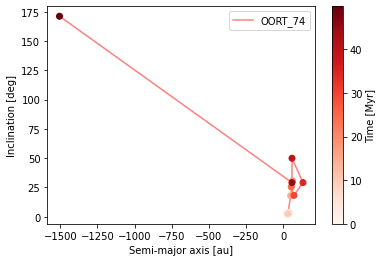

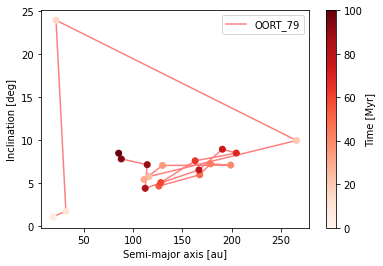

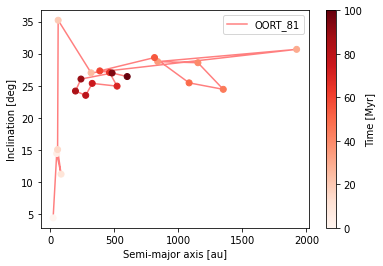

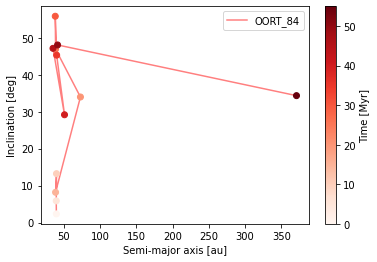

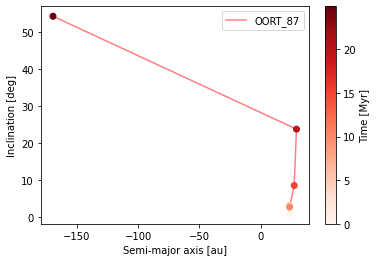

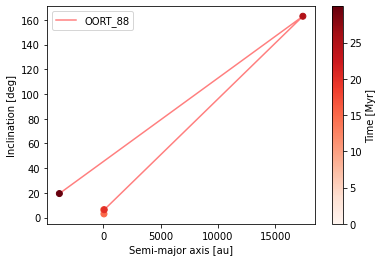

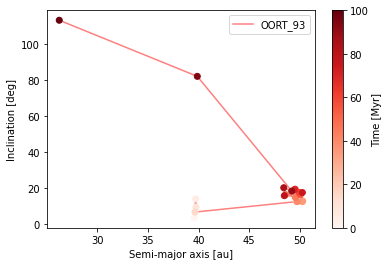

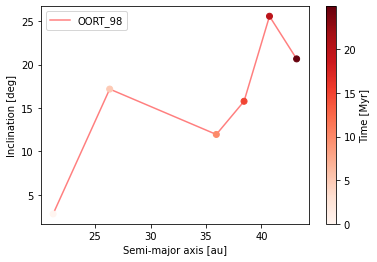

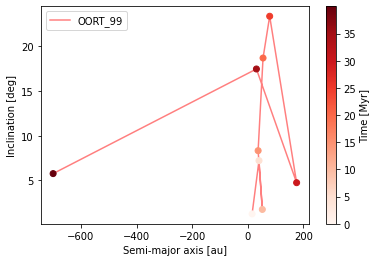

In [218]:
inclis = []
semimajoraxes = []
names = []
for particles in sets:
    inclis.append(inclinations(particles[0], particles[1:]).in_(units.deg).number) # .number is necessary here to plot
    semimajoraxes.append(a_orbit(particles[0], particles[1:]).in_(units.AU).number) # .number is necessary here to plot
    names.append(particles[1:].name)
inclis, semimajoraxes = np.array(inclis, dtype=object), np.array(semimajoraxes, dtype=object)

    
inclis_per_obj = []
a_per_obj = []
for i in range(len(names[0])): # Loop over all objects present in the zeroth time step
    temp_inclis = []
    temp_a = []
    for j in range(len(sets)): # Loop over all timesteps
        i_value = inclis[j][names[j]==names[0][i]] # Find the inclination of object with name i at timestep j
        a_value = semimajoraxes[j][names[j]==names[0][i]] # Find the semi-major axis of object with name i at timestep j
        if len(i_value)>0: # Takes care of empty lists, i.e. where particles were deleted
            temp_inclis.append(i_value[0])
            temp_a.append(a_value[0])
    inclis_per_obj.append(temp_inclis)
    a_per_obj.append(temp_a)

for i, a, name in zip(inclis_per_obj, a_per_obj, names[0]):
    if len(i)>5:
        plot.scatter(a, i, c=times[:len(i)]/1e6, cmap='Reds')
        plot.plot(a, i, label=name, c='r', zorder=-1, alpha=0.5)
        plt.xlabel("Semi-major axis [au]")
        plt.ylabel("Inclination [deg]")
        plt.colorbar(label="Time [Myr]")
        plt.legend()
        plt.show()

Let's check up till what timestep the Solar System is relatively normal, in order to know what data is most reliable.

We do this by taking the following parameters:
- semi-major axis
- eccentricity
- inclination
of the gas giants, and checking what the ratio between it and the original value $r_j = \frac{j}{j_0}$ is. If all values $r_a, r_e, r_i$ < 2, their values have not doubled and this is considered a normal Solar System

/home/pim/.local/lib/python3.6/site-packages/amuse/units/quantities.py:135: RuntimeWarning: invalid value encountered in true_divide
  return new_quantity_nonone(operator.__truediv__(self.number,other.number), (self.unit / other.unit).to_simple_form())


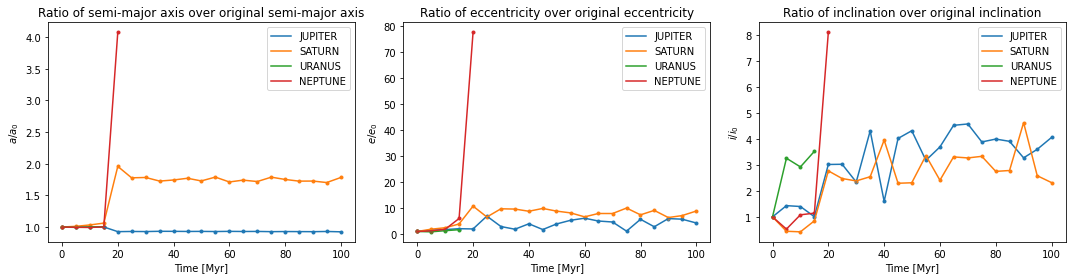

In [220]:
Sun_giants = sets[0][:5]
a0 = a_orbit(Sun_giants[0], Sun_giants).in_(units.AU)
e0 = eccentricities(Sun_giants[0], Sun_giants)
i0 = inclinations(Sun_giants[0], Sun_giants).in_(units.deg)

fig, axs = plt.subplots(1,3, figsize=(15,4))
for planet in ['JUPITER', 'SATURN', 'URANUS', 'NEPTUNE']:
    r_a, r_e, r_i = [], [], []
    for particles in sets[1:]:
        if sum(particles.name == planet) == 1:
            giant = particles[particles.name == planet]
            a = a_orbit(particles[0], giant).in_(units.AU)
            e = eccentricities(particles[0], giant)
            i = inclinations(particles[0], giant).in_(units.deg)
            r_a.append(a/a0[Sun_giants.name == planet])
            r_e.append(e/e0[Sun_giants.name == planet])
            r_i.append(i/i0[Sun_giants.name == planet])
    axs[0].scatter(times[:len(r_a)+1]/1e6, np.append([1], r_a), marker='.')
    axs[0].plot(times[:len(r_a)+1]/1e6, np.append([1], r_a), label=planet)
    axs[1].scatter(times[:len(r_e)+1]/1e6, np.append([1], r_e), marker='.')
    axs[1].plot(times[:len(r_e)+1]/1e6, np.append([1], r_e), label=planet)
    axs[2].scatter(times[:len(r_i)+1]/1e6, np.append([1], r_i), marker='.')
    axs[2].plot(times[:len(r_i)+1]/1e6, np.append([1], r_i), label=planet)
axs[0].legend()
axs[0].set_xlabel("Time [Myr]")
axs[0].set_ylabel(r"$a/a_0$")
axs[0].set_title("Ratio of semi-major axis over original semi-major axis")
axs[1].legend()
axs[1].set_xlabel("Time [Myr]")
axs[1].set_ylabel(r"$e/e_0$")
axs[1].set_title("Ratio of eccentricity over original eccentricity")
axs[2].legend()
axs[2].set_xlabel("Time [Myr]")
axs[2].set_ylabel(r"$i/i_0$")
axs[2].set_title("Ratio of inclination over original inclination")
fig.tight_layout()